# **Model Analysis, Seven-back**

In [8]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import pearsonr

## Non-Differential

In [9]:
# parameter statistics

RAll = pd.read_csv('../Outputs/Lmfit_RHM_NonDif_<7.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC', 'R^2']

print('Average RHM Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(RAll[i])))
    print( i + ' Median: ' + str(np.median(RAll[i])))
    print( i + ' SD: ' + str(np.std(RAll[i])))

print('\n')

DCAll = pd.read_csv('../Outputs/Lmfit_DC_NonDif_<7.csv')

params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Baseline', 'Forgetting Factor', 'Linear Attraction', 'Cubic Attraction', 'BIC', 'R^2']

print('Average DynAffect-C Weights')
for i in params:
    print( i + ' Mean: ' + str(np.mean(DCAll[i])))
    print( i + ' Median: ' + str(np.median(DCAll[i])))
    print( i + ' SD: ' + str(np.std(DCAll[i])))

# determine types of attraction dynamics
positive = 0
negative = 0
pos_neg = 0
neg_pos = 0
for i in range(0, len(DCAll)):
    if (DCAll['Cubic Attraction'][i]>=0):
        if (DCAll['Linear Attraction'][i]>0):
            positive += 1
        else:
            pos_neg += 1
    else:
        if (DCAll['Linear Attraction'][i]>0):
            neg_pos += 1
        else:
            negative += 1
print('Alpha positive, Beta positive: ', positive)
print('Alpha positive, Beta negative: ', pos_neg)
print('Alpha negative, Beta positive: ', neg_pos)
print('Alpha negative, Beta negative: ', negative)

Average RHM Weights
Certain Reward Mean: 0.08196717002245606
Certain Reward Median: 0.05
Certain Reward SD: 0.2638700224674404
Expected Value Mean: 0.06352877369562514
Expected Value Median: 0.0426417345284333
Expected Value SD: 0.1883089331520971
Prediction Error Mean: 0.14596207773161787
Prediction Error Median: 0.10216899324151525
Prediction Error SD: 0.1983915279499144
Forgetting Factor Mean: 0.5431104632804601
Forgetting Factor Median: 0.60142752551849
Forgetting Factor SD: 0.33784869525904854
Baseline Mean: 58.32261333764277
Baseline Median: 55.63153215816028
Baseline SD: 15.462016797834247
BIC Mean: 47.27513140305029
BIC Median: 47.48544682378872
BIC SD: 18.933013651557626
R^2 Mean: 0.6303751620838284
R^2 Median: 0.6698638039796856
R^2 SD: 0.2176484287221627


Average DynAffect-C Weights
Certain Reward Mean: 0.08825497795169407
Certain Reward Median: 0.05050611536525315
Certain Reward SD: 0.27247800622878726
Expected Value Mean: 0.0673265947943435
Expected Value Median: 0.045990

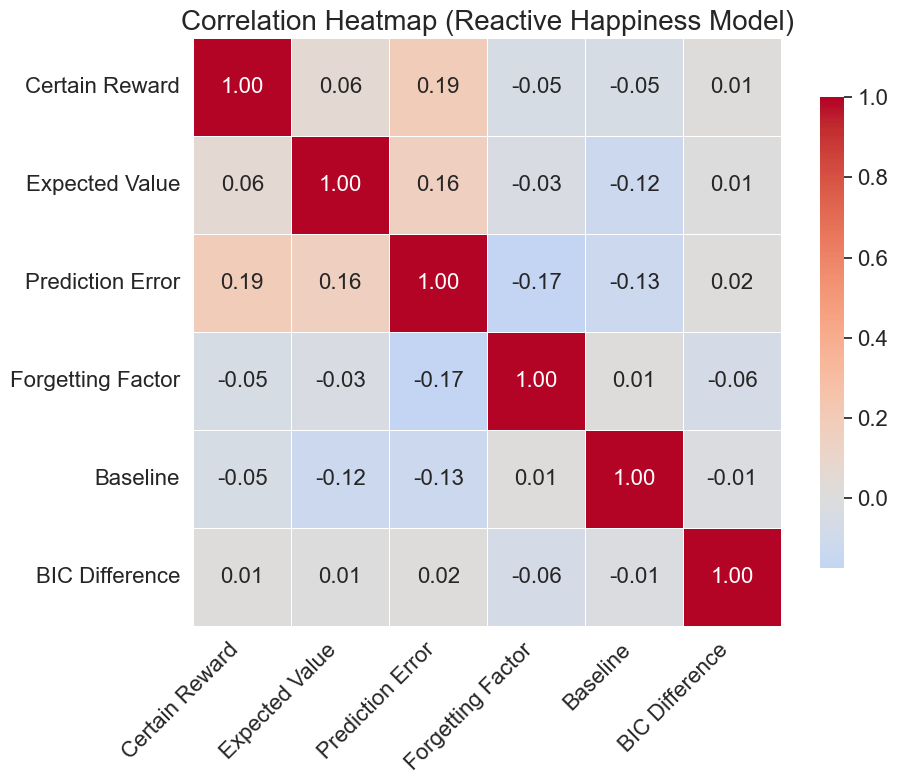

                   Certain Reward  Expected Value  Prediction Error  \
Certain Reward       0.000000e+00    1.420568e-12     4.120902e-125   
Expected Value       1.420568e-12    0.000000e+00      1.836316e-84   
Prediction Error    4.120902e-125    1.836316e-84      0.000000e+00   
Forgetting Factor    5.332298e-09    1.084863e-04      1.696047e-99   
Baseline             9.638975e-11    1.845493e-51      7.110501e-58   
BIC Difference       7.313361e-02    4.843102e-01      3.348825e-02   

                   Forgetting Factor      Baseline  BIC Difference  
Certain Reward          5.332298e-09  9.638975e-11    7.313361e-02  
Expected Value          1.084863e-04  1.845493e-51    4.843102e-01  
Prediction Error        1.696047e-99  7.110501e-58    3.348825e-02  
Forgetting Factor       0.000000e+00  9.709062e-02    5.274566e-13  
Baseline                9.709062e-02  0.000000e+00    1.073821e-01  
BIC Difference          5.274566e-13  1.073821e-01    0.000000e+00  


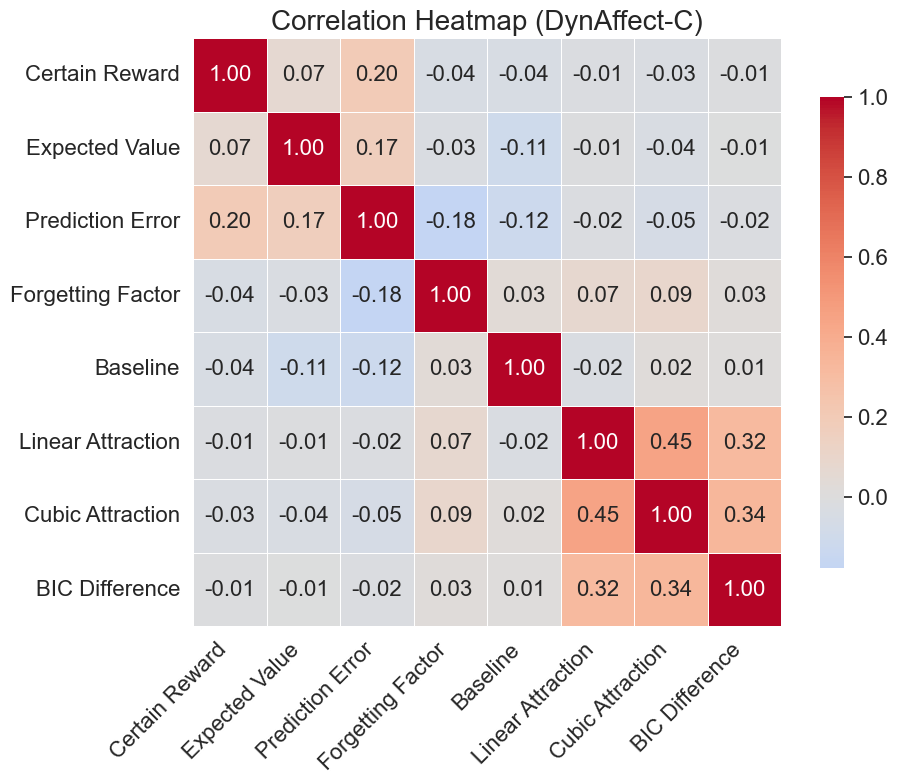

                   Certain Reward  Expected Value  Prediction Error  \
Certain Reward       0.000000e+00    2.936989e-15     1.254869e-128   
Expected Value       2.936989e-15    0.000000e+00      4.405522e-90   
Prediction Error    1.254869e-128    4.405522e-90      0.000000e+00   
Forgetting Factor    2.129388e-06    1.951534e-03     4.515065e-101   
Baseline             1.208664e-06    2.369135e-37      3.269439e-50   
Linear Attraction    7.741333e-02    4.104668e-01      7.111819e-03   
Cubic Attraction     1.361232e-03    1.439786e-05      1.219533e-10   
BIC Difference       8.940017e-02    5.375136e-01      3.515833e-02   

                   Forgetting Factor      Baseline  Linear Attraction  \
Certain Reward          2.129388e-06  1.208664e-06       7.741333e-02   
Expected Value          1.951534e-03  2.369135e-37       4.104668e-01   
Prediction Error       4.515065e-101  3.269439e-50       7.111819e-03   
Forgetting Factor       0.000000e+00  4.519640e-05       7.314193e-1

In [10]:
diff = DCAll['BIC'] - RAll['BIC']
RAll['BIC Difference'] = diff
DCAll['BIC Difference'] = diff

# correlation/p-value function
def correlation_with_pvalues(df, params):
    cols = params
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for param1 in cols:
        for param2 in cols:
            corr, pval = pearsonr(df[param1], df[param2])
            corr_matrix.loc[param1, param2] = corr
            pval_matrix.loc[param1, param2] = pval

    return corr_matrix, pval_matrix

# heatmap plotting function
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 16})
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize = 16)
    plt.yticks(rotation=0, fontsize=16)
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=16)
    plt.tight_layout()
    plt.savefig('../Figures/' + title + '_<7.png', dpi=1200)
    plt.show()

# generate RHM heatmap
params1 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'BIC Difference']
corr_matrix_rall, formatted = correlation_with_pvalues(RAll, params1)
plot_heatmap(corr_matrix_rall, "Correlation Heatmap (Reactive Happiness Model)")
print(formatted)

# generate DC heatmap
params2 = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'Cubic Attraction', 'BIC Difference']
corr_matrix_dcall, formatted = correlation_with_pvalues(DCAll, params2)
plot_heatmap(corr_matrix_dcall, "Correlation Heatmap (DynAffect-C)")
print(formatted)

Median RHM R^2:  0.6201545968530264
Median DC R^2:  0.834733897252033
STD RHM R^2:  0.21570282340123806
STD RHM R^2:  0.21317565669783284
Median RHM BIC:  55.31668007958892
Median RHM BIC:  49.56762068181127
N =  2821
BIC Difference:  TtestResult(statistic=-30.489984652182876, pvalue=9.935266790123224e-177, df=2821)


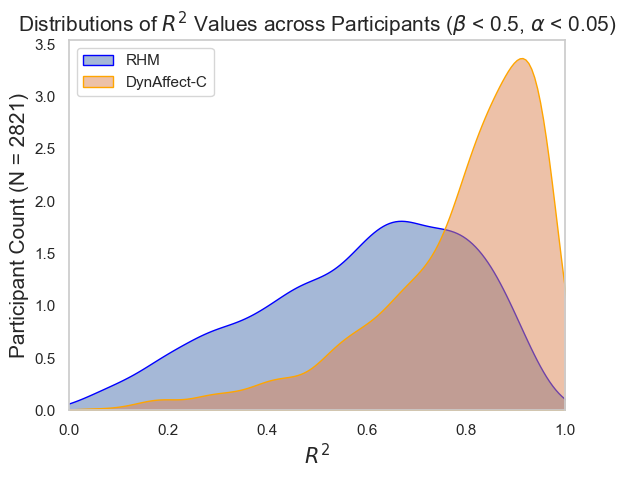

In [11]:
#filtered fits

list = {'Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline', 'Linear Attraction', 'BIC', 'R^2'}
filtered = {'Certain Reward':[], 'Expected Value':[], 'Prediction Error':[], 'Forgetting Factor':[], 'Baseline':[], 'Linear Attraction':[], 'BIC':[], 'R^2':[]}

R_filtered = []
LA_filtered = []
R_BIC = []
LA_BIC = []

# filter participants with weak attraction dynamics
for i, j in enumerate(DCAll['Linear Attraction']):
    if j < 0.5 and DCAll['Cubic Attraction'][i] < 0.05:
        for k in list:
            filtered[k].append(DCAll[k][i])
        R_filtered.append(RAll['R^2'][i])
        LA_filtered.append(DCAll['R^2'][i])
        R_BIC.append(RAll['BIC'][i])
        LA_BIC.append(DCAll['BIC'][i])

print('Median RHM R^2: ', np.median(R_filtered))
print('Median DC R^2: ', np.median(LA_filtered))
print('STD RHM R^2: ',np.std(R_filtered))
print('STD RHM R^2: ',np.std(LA_filtered))
print('Median RHM BIC: ',np.median(R_BIC))
print('Median RHM BIC: ',np.median(LA_BIC))

R_filtered2 = [x for x in R_filtered if x > 0]
LA_filtered2 = [x for x in LA_filtered if x > 0]

print('N = ', len(R_filtered2))

sns.kdeplot(R_filtered2, alpha=0.5, fill=True, edgecolor='blue',
         label='RHM')
sns.kdeplot(LA_filtered2, alpha=0.5, fill=True, edgecolor='orange',
         label='DynAffect-C')
plt.title(r'Distributions of $R^2$ Values across Participants ($\beta$ < 0.5, $\alpha$ < 0.05)', fontsize=15)
plt.xlabel('$R^2$', fontsize=15)
plt.ylabel(f'Participant Count (N = {len(R_filtered2)})', fontsize=15)

plt.legend()
plt.xlim(0,1)
plt.grid(False)
plt.savefig('../Figures/subset_<7.png', dpi=1200)

print('BIC Difference: ', stat.ttest_rel(LA_BIC, R_BIC))

In [13]:
# calculate effect sizes

def cohen_d(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)  # sample std
    std2 = np.std(group2, ddof=1)

    # pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

    # cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

print('BIC Difference: ', stat.ttest_rel(DCAll['BIC'], RAll['BIC']))
print('Forgetting Factor: ', stat.ttest_rel(DCAll['Forgetting Factor'], RAll['Forgetting Factor']))
print(f"Cohen's d (change in forgetting factor): {cohen_d(DCAll['Forgetting Factor'], RAll['Forgetting Factor']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC): {cohen_d(DCAll['BIC'], RAll['BIC']):.3f}")
print(f"Cohen's d (DynAffect-C and original happiness model BIC, filtered): {cohen_d(LA_BIC, R_BIC):.3f}")
DC_all_back = pd.read_csv('../Outputs/Lmfit_DC_NonDif_<7.csv')
print(f"Cohen's d (change in when limiting memory): {cohen_d(DCAll['Forgetting Factor'], DC_all_back['Forgetting Factor']):.3f}")

BIC Difference:  TtestResult(statistic=26.630963223322524, pvalue=1.259441973730215e-152, df=14629)
Forgetting Factor:  TtestResult(statistic=-31.93282194740589, pvalue=2.3018620279896213e-216, df=14629)
Cohen's d (change in forgetting factor): -0.217
Cohen's d (DynAffect-C and original happiness model BIC): 0.089
Cohen's d (DynAffect-C and original happiness model BIC, filtered): -0.255
Cohen's d (change in when limiting memory): 0.000


/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64219/4235853922.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64219/4235853922.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
/var/folders/9d/7b80y3ns221bt1hc8j0s0rsm0000gn/T/ipykernel_64219/4235853922.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined

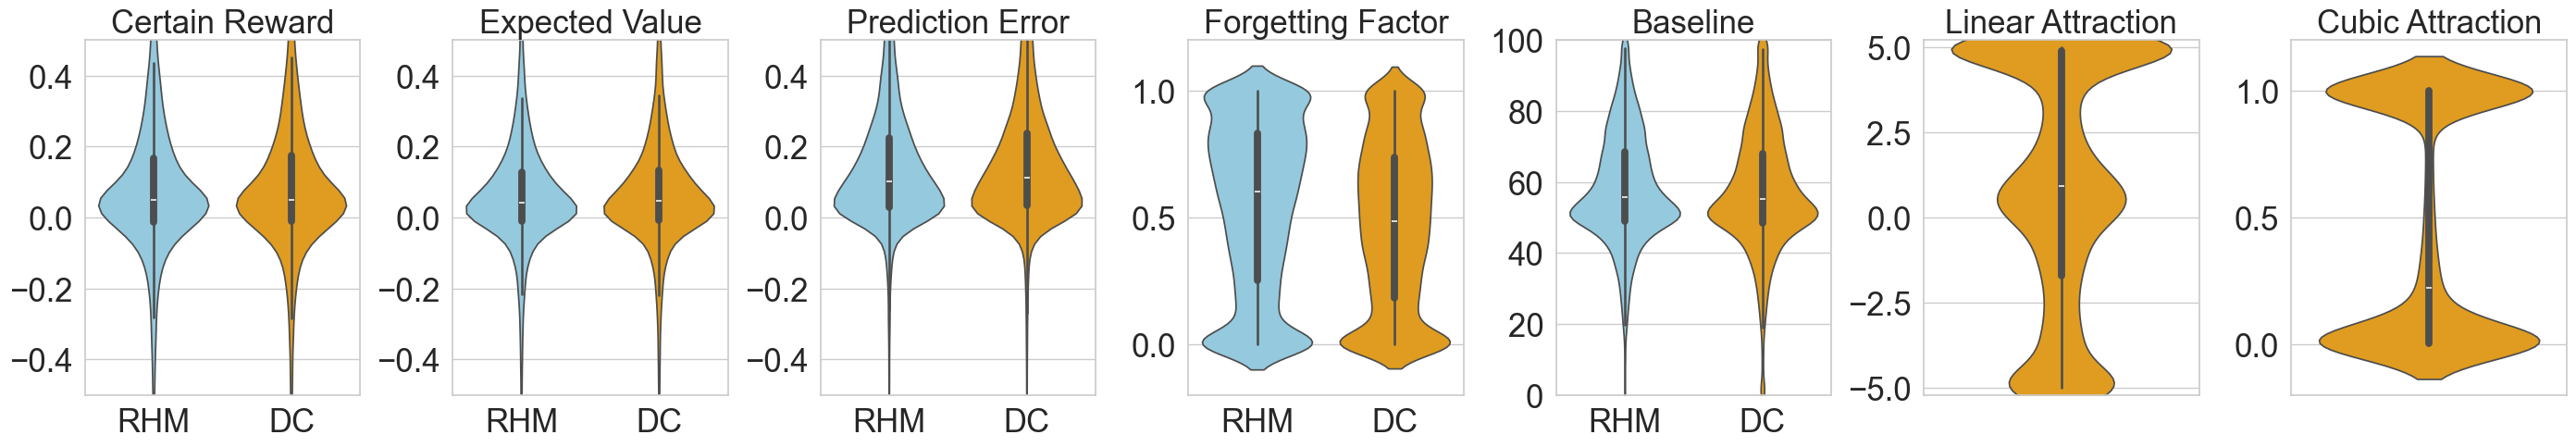

In [14]:
# generate violin plots

# parameters to compare
common_params = ['Certain Reward', 'Expected Value', 'Prediction Error', 'Forgetting Factor', 'Baseline']
dynonly_params = ['Linear Attraction', 'Cubic Attraction']

# prepare combined dataframe for common parameters
combined_data = pd.concat([
    RAll[common_params].assign(Model='RHM'),
    DCAll[common_params].assign(Model='DC')
])

palette = {'RHM': 'skyblue', 'DC': 'orange'}
sns.set(style='whitegrid')
n_plots = len(common_params) + len(dynonly_params)
fig, axes = plt.subplots(1, n_plots, figsize=(4 * n_plots, 5), sharey=False)

# plot shared parameters with both models
for i, param in enumerate(common_params):
    sns.violinplot(data=combined_data, x='Model', y=param, palette=palette, ax=axes[i])
    axes[i].set_title(param, fontsize=25)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=25)
    axes[i].tick_params(axis='x', labelsize=25)

# plot DynAffect-only parameters (Beta, Alpha)
for j, param in enumerate(dynonly_params):
    sns.violinplot(data=DCAll, y=param, color='orange', ax=axes[len(common_params) + j])
    axes[len(common_params) + j].set_title(param, fontsize=25)
    axes[len(common_params) + j].set_xlabel('')
    axes[len(common_params) + j].set_ylabel('')
    axes[len(common_params) + j].set_xticks([])
    axes[len(common_params) + j].tick_params(axis='y', labelsize=25)

axes[0].set_ylim([-0.5, 0.5])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[3].set_ylim([-0.2, 1.2])
axes[4].set_ylim([0, 100])
axes[5].set_ylim([-5.2, 5.2])
axes[6].set_ylim([-0.2, 1.2])

plt.tight_layout()
plt.savefig('../Figures/violin_<7.png', dpi=1200)
plt.show()